In [59]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, subprocess, random, time
from IPython.display import display, HTML
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import networkx as nx
import copy
try:
    print(open('README.md').read())
except:
    pass
print('-'*100)
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        if 'git' in str(root):
            continue
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
list_files('.')

def prints(txt):
    txt = str(txt)
    try:
        print(txt[:1000])
    except:
        pass
    #print(txt)


# LumPy
[![License: GPL v3](https://img.shields.io/badge/License-GPL%20v3-blue.svg)](http://www.gnu.org/licenses/gpl-3.0)
[![Build Status](https://travis-ci.org/gerritgr/LumPyQest.svg?branch=master)](https://travis-ci.org/gerritgr/LumPyQest)

Copyright: 2018, Gerrit Großmann, [Group of Modeling and Simulation](https://mosi.uni-saarland.de/) at [Saarland University](http://www.cs.uni-saarland.de/)

Version: 0.1 (Please note that this code is an experimental version in a very early development stage.)
## Overview
------------------
The LumPy toolset provides a proof of concept for lumping for AME equations for multistate processes on complex networks.
It reduces the large number of ODEs given by the equation systems by clustering them and only solving a single ODE per cluster.
LumPy is written in Python 3 (requiring SciPy) and published under GPL v3 license.

As input, the tool takes model descriptions (containing degree distribution, rules,
time horizon, etc.) and outputs the lumped (o

In [60]:
clustering_file = 'output/SIS/clustering_SIS_306.csv'
clustering_original_file = 'output/SISfull/clustering_SISfull_1326.csv'
dynamics_original_file = 'output/SISfull/ame_SISfull_1326_trajectories_individual.csv'
dynamics_reduced_file = 'output/SIS/ame_SIS_306_trajectories_individual.csv'  #73

clustering_file = 'output/SIS/clustering_SIS_73.csv'
dynamics_reduced_file = 'output/SIS/ame_SIS_73_trajectories_individual.csv'  #73

clustering = pd.read_csv(clustering_file, skiprows=1, sep=';') 
clustering_original = pd.read_csv(clustering_original_file, skiprows=1, sep=';') 
dynamics_original = pd.read_csv(dynamics_original_file, skiprows=1, sep=';')  #open(dynamics_original_file).read()
dynamics_reduced = pd.read_csv(dynamics_reduced_file, skiprows=1, sep=';')  #open(dynamics_reduced_file).read()



In [61]:
clustering_original.head()
len(set(list(clustering['cluster'])))

73

# Funtion m to cluster and vice versa

In [62]:
def get_cluster_maps(clustering):
    try:
        clustering = clustering.to_dict(orient='records')
    except: 
        pass
    
    m_to_cluster = dict()
    cluster_to_m = dict()
    m_to_weight = dict()
    for line in clustering:
        m = eval(line['m'])
        cluster = line['cluster']
        weight = line['weight']
        m_to_cluster[m] = cluster
        m_to_weight[m] = weight
        if cluster not in cluster_to_m:
            cluster_to_m[cluster] = list()
        cluster_to_m[cluster].append(m)
    return m_to_cluster, cluster_to_m, m_to_weight

# Plot Original

### 2652 ODEs and 1326 cluster

In [47]:
print(clustering_original.head())
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering_original)
print(str(cluster_to_m)[:1000])

          m               cluster  weight
0    (7, 3)  (10, (699.0, 300.0))     1.0
1   (31, 6)  (37, (837.0, 162.0))     1.0
2   (5, 31)  (36, (138.0, 861.0))     1.0
3  (20, 25)  (45, (444.0, 555.0))     1.0
4   (3, 35)   (38, (78.0, 921.0))     1.0
{'(10, (699.0, 300.0))': [(7, 3)], '(37, (837.0, 162.0))': [(31, 6)], '(36, (138.0, 861.0))': [(5, 31)], '(45, (444.0, 555.0))': [(20, 25)], '(38, (78.0, 921.0))': [(3, 35)], '(25, (639.0, 360.0))': [(16, 9)], '(34, (176.0, 823.0))': [(6, 28)], '(49, (428.0, 571.0))': [(21, 28)], '(40, (99.0, 900.0))': [(4, 36)], '(23, (826.0, 173.0))': [(19, 4)], '(46, (934.0, 65.0))': [(43, 3)], '(37, (459.0, 540.0))': [(17, 20)], '(32, (218.0, 781.0))': [(7, 25)], '(41, (536.0, 463.0))': [(22, 19)], '(27, (740.0, 259.0))': [(20, 7)], '(48, (916.0, 83.0))': [(44, 4)], '(37, (486.0, 513.0))': [(18, 19)], '(49, (469.0, 530.0))': [(23, 26)], '(27, (777.0, 222.0))': [(21, 6)], '(13, (615.0, 384.0))': [(8, 5)], '(34, (941.0, 58.0))': [(32, 2)], '(45, (288.0,

In [48]:
dynamics_original.head()

,"('I', '(0, (0.0, 999.0))')","('I', '(1, (0.0, 999.0))')","('I', '(1, (999.0, 0.0))')","('I', '(10, (0.0, 999.0))')","('I', '(10, (199.0, 800.0))')","('I', '(10, (299.0, 700.0))')","('I', '(10, (399.0, 600.0))')","('I', '(10, (499.0, 500.0))')","('I', '(10, (599.0, 400.0))')","('I', '(10, (699.0, 300.0))')",...,"('S', '(9, (0.0, 999.0))')","('S', '(9, (111.0, 888.0))')","('S', '(9, (222.0, 777.0))')","('S', '(9, (333.0, 666.0))')","('S', '(9, (444.0, 555.0))')","('S', '(9, (555.0, 444.0))')","('S', '(9, (666.0, 333.0))')","('S', '(9, (777.0, 222.0))')","('S', '(9, (888.0, 111.0))')","('S', '(9, (999.0, 0.0))')"
0,7.464749e-11,0.067183,0.007465,8.230767e-05,0.000046,0.000014,0.000003,3.512597e-07,3.252405e-08,2.065019e-09,...,0.001071,0.001071,0.000476,0.000123,0.000021,0.000002,1.693005e-07,8.061929e-09,2.239425e-10,2.764722e-12
1,7.136282e-11,0.052267,0.030967,1.030474e-05,0.000160,0.000160,0.000100,4.285951e-05,1.274047e-05,2.611262e-06,...,0.000600,0.000889,0.000586,0.000227,0.000057,0.000010,1.097069e-06,8.416672e-08,4.013849e-09,9.346394e-11
2,6.822267e-11,0.041662,0.053330,2.126014e-06,0.000150,0.000227,0.000224,1.565866e-04,7.852179e-05,2.776193e-05,...,0.000340,0.000650,0.000555,0.000280,0.000093,0.000022,3.843804e-06,5.232218e-07,5.188697e-08,2.749108e-09
3,6.522070e-11,0.034487,0.074257,9.199038e-07,0.000120,0.000223,0.000284,2.652625e-04,1.841542e-04,9.230811e-05,...,0.000207,0.000460,0.000459,0.000273,0.000110,0.000033,8.451928e-06,1.857919e-06,3.054601e-07,2.578077e-08
4,6.235083e-11,0.029845,0.093532,5.771082e-07,0.000091,0.000193,0.000287,3.275440e-04,2.859434e-04,1.843058e-04,...,0.000136,0.000328,0.000358,0.000236,0.000108,0.000040,1.383653e-05,4.349116e-06,9.995462e-07,1.144244e-07


In [71]:
os.system('mkdir gif_out')

def plot_dyn(m_to_value, title='Original I Fraction', t=0.3, clusters=100):
    import matplotlib.cm as cm
    x_list = list()
    y_list = list()
    value_list = list()
    clusters = len(set(m_to_value.values())) #does not work, need to use clusters
    
    for m, value in m_to_value.items():
        x_list.append(m[0])
        y_list.append(m[1])
        value_list.append(value)
        
        
    value_list = [np.log(n+0.0000000001) for n in value_list]    
    
    
    ax = plt.gca()
    ax.scatter(x_list, y_list, c=value_list, alpha=0.9, linewidths=0.0, cmap=cm.plasma, marker=',', s=16)
    ax.set_xlim([-0.5, 55])
    ax.set_ylim([-0.5, 55])
    ax.set_aspect(1.0)
    ax.set(xlabel='Neighbors in state I', ylabel='Neighbors in state S')
    t = str(t)
    t += '000000000'
    t = t[:5]
    plt.title('Probability Mass at t={}, {} clusters'.format(t,clusters))
    plt.savefig('gif_out/'+title.replace(' ','')+'.jpg' , dpi=1000)
    

{(0, 0): 7.464749463148459e-11, (0, 1): 0.06718274516833614, (1, 0): 0.007464749463148461, (0, 10): 8.230767434916922e-05, (2, 8): 4.572648574953849e-05, (3, 7): 1.3548588370233603e-05, (4, 6): 2.634447738656541e-06, (5, 5): 3.5125969848753935e-07, (6, 4): 3.252404615625367e-08, (7, 3): 2.065018803571661e-09, (8, 2): 8.604245014881892e-11, (9, 1): 2.124504941946136e-12, (1, 9): 9.14529714990768e-05, (10, 0): 2.3605610466068345e-14, (0, 11): 5.837153675187414e-05, (2, 9): 3.963499409077874e-05, (3, 8): 1.3211664696926233e-05, (4, 7): 2.9359254882058386e-06, (5, 6): 4.5669952038757497e-07, (6, 5): 5.074439115417505e-08, (7, 4): 4.027332631283742e-09, (8, 3): 2.2374070173798472e-10, (9, 2): 8.286692656962395e-12, (1, 10): 7.134298936340169e-05, (10, 1): 1.841487257102758e-13, (11, 0): 1.86008813848764e-15, (0, 12): 4.226415927827759e-05, (2, 10): 3.443746311563347e-05, (3, 9): 1.2754615968753153e-05, (4, 8): 3.1886539921882874e-06, (5, 7): 5.668718208334756e-07, (6, 6): 7.348338418211695e

{(0, 0): 4.978814792505536e-11, (0, 1): 0.025150360195919333, (1, 0): 0.1648398020747578, (0, 10): 9.977788006726225e-08, (2, 8): 1.916924685987083e-05, (3, 7): 4.977041286994973e-05, (4, 6): 0.00010830028811126658, (5, 5): 0.00021386899793863256, (6, 4): 0.0003645573957992809, (7, 3): 0.0004908431096215705, (8, 2): 0.0004737646010432444, (9, 1): 0.0002868040557190021, (1, 9): 4.483775640878049e-06, (10, 0): 8.117241989433969e-05, (0, 11): 4.2242146290395805e-08, (2, 9): 9.303612874284516e-06, (3, 8): 2.4458134373753283e-05, (4, 7): 5.318312480528961e-05, (5, 6): 0.0001078434611355338, (6, 5): 0.00020035677393238303, (7, 4): 0.00031590585468805455, (8, 3): 0.0003891163434993416, (9, 2): 0.00034274077383880365, (1, 10): 2.0907557938255463e-06, (10, 1): 0.00018976660678686222, (11, 0): 4.93270066847845e-05, (0, 12): 1.8527829517924202e-08, (2, 10): 4.646908016955649e-06, (3, 9): 1.2415317330701123e-05, (4, 8): 2.6839623379373354e-05, (5, 7): 5.452464119420256e-05, (6, 6): 0.0001060170387

{(0, 0): 3.3207540144705253e-11, (0, 1): 0.03069736256497428, (1, 0): 0.22351752590580037, (0, 10): 8.474993834805025e-09, (2, 8): 1.5475434046633629e-06, (3, 7): 3.670427432590849e-06, (4, 6): 1.057684190959021e-05, (5, 5): 3.820235285453157e-05, (6, 4): 0.00013069714056838225, (7, 3): 0.000347255611035374, (8, 2): 0.0006388626096689032, (9, 1): 0.0007157561475910553, (1, 9): 4.7482911339402637e-07, (10, 0): 0.0003666931757186821, (0, 11): 3.0802861672818692e-09, (2, 9): 6.271051507723815e-07, (3, 8): 1.3717658999040783e-06, (4, 7): 3.316022157184238e-06, (5, 6): 1.0974435183230088e-05, (6, 5): 4.0460168528611844e-05, (7, 4): 0.0001288919291927546, (8, 3): 0.0003105476635218416, (9, 2): 0.0005171968909674975, (1, 10): 1.9015918551979036e-07, (10, 1): 0.0005271910652704137, (11, 0): 0.000247311820733182, (0, 12): 1.1624705233258706e-09, (2, 10): 2.6492494340426686e-07, (3, 9): 5.567853772897709e-07, (4, 8): 1.1572785676189507e-06, (5, 7): 3.268006511881938e-06, (6, 6): 1.19650661737130

{(0, 0): 2.214865449791104e-11, (0, 1): 0.032496631523593084, (1, 0): 0.2443040604247498, (0, 10): 1.537071699500054e-09, (2, 8): 2.6031007784053625e-07, (3, 7): 6.781934087792297e-07, (4, 6): 3.0750160050398153e-06, (5, 5): 1.7134330913822598e-05, (6, 4): 7.927457973071939e-05, (7, 3): 0.00026599378818156365, (8, 2): 0.0005993880766617727, (9, 1): 0.0008100108268949672, (1, 9): 9.526706137629658e-08, (10, 0): 0.0004961361583996941, (0, 11): 4.980785896072939e-10, (2, 9): 9.092557322896717e-08, (3, 8): 1.9420380795540591e-07, (4, 7): 6.827141411387373e-07, (5, 6): 3.7702351605631613e-06, (6, 5): 1.998697966578013e-05, (7, 4): 8.251560744058354e-05, (8, 3): 0.0002461922634745608, (9, 2): 0.0004972201241342425, (1, 10): 3.394515123913964e-08, (10, 1): 0.0006077942731623661, (11, 0): 0.0003395926002199137, (0, 12): 1.6786506971922786e-10, (2, 10): 3.3628589076550855e-08, (3, 9): 6.3689824962211e-08, (4, 8): 1.6797449408947578e-07, (5, 7): 8.242402233702039e-07, (6, 6): 4.724948789868791e-

{(0, 0): 1.4772631238337445e-11, (0, 1): 0.03302420190890535, (1, 0): 0.2523187733292364, (0, 10): 4.2600050569071386e-10, (2, 8): 7.917848231708114e-08, (3, 7): 3.1354213280884123e-07, (4, 6): 2.1193793261468244e-06, (5, 5): 1.3866060801461738e-05, (6, 4): 6.933845025026999e-05, (7, 3): 0.0002462919090827773, (8, 2): 0.0005838675761286686, (9, 1): 0.0008280461730983256, (1, 9): 2.7389100479693115e-08, (10, 0): 0.0005315991643255512, (0, 11): 1.2230194374132379e-10, (2, 9): 2.3006537742512407e-08, (3, 8): 6.850054496104591e-08, (4, 7): 4.05625119796062e-07, (5, 6): 2.8581638027474064e-06, (6, 5): 1.6694956215579583e-05, (7, 4): 7.323457545369073e-05, (8, 3): 0.0002299784963816512, (9, 2): 0.0004873202276227825, (1, 10): 8.63283450049107e-09, (10, 1): 0.0006241209174371747, (11, 0): 0.0003650768839548596, (0, 12): 3.672486756291997e-11, (2, 10): 7.277024442284833e-09, (3, 9): 1.7124824459529277e-08, (4, 8): 8.067850990226304e-08, (5, 7): 5.739562144821798e-07, (6, 6): 3.760079869588588e

{(0, 0): 9.852999187200451e-12, (0, 1): 0.03336365621510288, (1, 0): 0.25627258353900934, (0, 10): 1.5062391855403523e-10, (2, 8): 3.7791638678449815e-08, (3, 7): 2.3637894629277005e-07, (4, 6): 1.9151973808115598e-06, (5, 5): 1.3118320122320654e-05, (6, 4): 6.691054114197049e-05, (7, 3): 0.00024117936656283881, (8, 2): 0.0005794316689100677, (9, 1): 0.0008324173112959233, (1, 9): 9.830030970518528e-09, (10, 0): 0.0005412256814734285, (0, 11): 3.757400220864778e-11, (2, 9): 8.879229183497735e-09, (3, 8): 4.425481351207891e-08, (4, 7): 3.5141435657852003e-07, (5, 6): 2.661817437510282e-06, (6, 5): 1.5923460984961954e-05, (7, 4): 7.091958719453398e-05, (8, 3): 0.00022569175239866386, (9, 2): 0.0004843765766359362, (1, 10): 2.688218381048425e-09, (10, 1): 0.0006281804858032227, (11, 0): 0.0003720487822820104, (0, 12): 9.899674503833886e-12, (2, 10): 2.307227938271413e-09, (3, 9): 8.995561282321667e-09, (4, 8): 6.529782420230911e-08, (5, 7): 5.240481648506677e-07, (6, 6): 3.543717879234163

{(0, 0): 6.571719444868834e-12, (0, 1): 0.033665561988166094, (1, 0): 0.2589194772066117, (0, 10): 6.607068440940356e-11, (2, 8): 2.550594062193656e-08, (3, 7): 2.1457413386566244e-07, (4, 6): 1.8604473662437122e-06, (5, 5): 1.2922645374436529e-05, (6, 4): 6.627622576508883e-05, (7, 3): 0.00023983581822290326, (8, 2): 0.0005782540728687225, (9, 1): 0.000833573023346917, (1, 9): 4.3589346853663836e-09, (10, 0): 0.0005438036634782182, (0, 11): 1.4069909986409527e-11, (2, 9): 5.073060877849735e-09, (3, 8): 3.792121272828828e-08, (4, 7): 3.374995361865174e-07, (5, 6): 2.6114041135241297e-06, (6, 5): 1.5723753377862318e-05, (7, 4): 7.031465030125075e-05, (8, 3): 0.00022455940478441274, (9, 2): 0.0004835822734797671, (1, 10): 1.016612768636155e-09, (10, 1): 0.0006292434255668857, (11, 0): 0.0003739116202947035, (0, 12): 3.188939105136348e-12, (2, 10): 1.0973920555457908e-09, (3, 9): 7.060088971092903e-09, (4, 8): 6.159916034013151e-08, (5, 7): 5.115884548434613e-07, (6, 6): 3.488303233839704

{(0, 0): 4.3831810080787755e-12, (0, 1): 0.03394959894410855, (1, 0): 0.2610690642022275, (0, 10): 3.801990459168351e-11, (2, 8): 2.14827760168732e-08, (3, 7): 2.078760424949469e-07, (4, 6): 1.846529761323645e-06, (5, 5): 1.2882142528245074e-05, (6, 4): 6.615909942941608e-05, (7, 3): 0.0002396032995512973, (8, 2): 0.0005780688767733819, (9, 1): 0.000833803751382825, (1, 9): 2.535520345490379e-09, (10, 0): 0.0005442662009379692, (0, 11): 7.060513551138663e-12, (2, 9): 3.945476318296016e-09, (3, 8): 3.6102810872892573e-08, (4, 7): 3.3399271856715553e-07, (5, 6): 2.60093529619444e-06, (6, 5): 1.5686827864091304e-05, (7, 4): 7.020872883047219e-05, (8, 3): 0.00022436751562205187, (9, 2): 0.0004834551836915881, (1, 10): 5.160870489513871e-10, (10, 1): 0.000629434788696964, (11, 0): 0.000374232663914641, (0, 12): 1.3919294704599005e-12, (2, 10): 7.744854864616085e-10, (3, 9): 6.549134789452792e-09, (4, 8): 6.0688831260036e-08, (5, 7): 5.089770283802848e-07, (6, 6): 3.4779962860156158e-06, (7,

{(0, 0): 2.9234784975896417e-12, (0, 1): 0.03421855703799385, (1, 0): 0.2629621925998174, (0, 10): 2.8527301217577514e-11, (2, 8): 2.0143555754338276e-08, (3, 7): 2.0605094006667615e-07, (4, 6): 1.8459644441658725e-06, (5, 5): 1.2893329609425488e-05, (6, 4): 6.621621522741967e-05, (7, 3): 0.00023974800629595299, (8, 2): 0.00057822423957858, (9, 1): 0.0008337238195171975, (1, 9): 1.917126535662851e-09, (10, 0): 0.0005440080419475273, (0, 11): 4.931586767263806e-12, (2, 9): 3.604457847599248e-09, (3, 8): 3.5616711153928225e-08, (4, 7): 3.337086572925449e-07, (5, 6): 2.603518318692902e-06, (6, 5): 1.5704409053867717e-05, (7, 4): 7.027174272925994e-05, (8, 3): 0.0002244964322351188, (9, 2): 0.00048355881620355725, (1, 10): 3.638028301452919e-10, (10, 1): 0.0006293323169089045, (11, 0): 0.0003740272964301044, (0, 12): 9.025630009133331e-13, (2, 10): 6.862205775431741e-10, (3, 9): 6.418402945551026e-09, (4, 8): 6.057810665437291e-08, (5, 7): 5.094899645443556e-07, (6, 6): 3.4826736595254946e

{(0, 0): 1.9498914303703937e-12, (0, 1): 0.03447247924048079, (1, 0): 0.2646778117717343, (0, 10): 2.5310694832830173e-11, (2, 8): 1.9716532588407097e-08, (3, 7): 2.0592649261697358e-07, (4, 6): 1.850339031066521e-06, (5, 5): 1.2924376419082084e-05, (6, 4): 6.63411551310852e-05, (7, 3): 0.00024004026909290704, (8, 2): 0.000578513587345256, (9, 1): 0.0008335240621127456, (1, 9): 1.706682957091207e-09, (10, 0): 0.0005434695759230094, (0, 11): 4.2823183220286115e-12, (2, 9): 3.503573723422506e-09, (3, 8): 3.5552381891549226e-08, (4, 7): 3.3455257650691837e-07, (5, 6): 2.611040527192384e-06, (6, 5): 1.574314971443418e-05, (7, 4): 7.040080761118592e-05, (8, 3): 0.000224751099663242, (9, 2): 0.0004837532621692463, (1, 10): 3.171822546837518e-10, (10, 1): 0.0006291156216543718, (11, 0): 0.0003736166018941169, (0, 12): 7.68403965396256e-13, (2, 10): 6.621897891081611e-10, (3, 9): 6.395898872043901e-09, (4, 8): 6.072718077479741e-08, (5, 7): 5.111599458343067e-07, (6, 6): 3.4931507703992157e-06

{(0, 0): 1.3005316424255912e-12, (0, 1): 0.03471096217660634, (1, 0): 0.2662470982353126, (0, 10): 2.4226574456196654e-11, (2, 8): 1.96043663328408e-08, (3, 7): 2.0642153961957346e-07, (4, 6): 1.856674057768137e-06, (5, 5): 1.2963632266521785e-05, (6, 4): 6.649436076062701e-05, (7, 3): 0.00024039396712985254, (8, 2): 0.0005788585343818214, (9, 1): 0.0008332747778384781, (1, 9): 1.6347897189286172e-09, (10, 0): 0.0005428157499425074, (0, 11): 4.082979049542507e-12, (2, 9): 3.477053246736048e-09, (3, 8): 3.562799496920803e-08, (4, 7): 3.3582599830231876e-07, (5, 6): 2.620593573795049e-06, (6, 5): 1.579073529541976e-05, (7, 4): 7.055748313920904e-05, (8, 3): 0.00022505811855843633, (9, 2): 0.00048398520525799033, (1, 10): 3.0267321840587905e-10, (10, 1): 0.0006288513886344398, (11, 0): 0.0003731211938202995, (0, 12): 7.308847782483969e-13, (2, 10): 6.559856407309846e-10, (3, 9): 6.4058477066580486e-09, (4, 8): 6.096999658927632e-08, (5, 7): 5.133021991433736e-07, (6, 6): 3.506061724301618

{(0, 0): 8.676008279486399e-13, (0, 1): 0.0349336784263872, (1, 0): 0.26768573290119996, (0, 10): 2.3867524901605932e-11, (2, 8): 1.9601743999026104e-08, (3, 7): 2.071425928686861e-07, (4, 6): 1.863747732966444e-06, (5, 5): 1.3005947699346123e-05, (6, 4): 6.665787213884867e-05, (7, 3): 0.0002407695439508607, (8, 2): 0.0005792225405324232, (9, 1): 0.0008330072698534654, (1, 9): 1.6099836379443875e-09, (10, 0): 0.0005421216639334165, (0, 11): 4.020693713721574e-12, (2, 9): 3.4739002933511754e-09, (3, 8): 3.575127153338936e-08, (4, 7): 3.372593213852687e-07, (5, 6): 2.6309116355420867e-06, (6, 5): 1.5841591620407398e-05, (7, 4): 7.072415270874445e-05, (8, 3): 0.00022538365642901104, (9, 2): 0.00048422983195548153, (1, 10): 2.9794126893530216e-10, (10, 1): 0.0006285699182922526, (11, 0): 0.000372596357752147, (0, 12): 7.197451938093425e-13, (2, 10): 6.548396400809897e-10, (3, 9): 6.426072689505222e-09, (4, 8): 6.124726565034138e-08, (5, 7): 5.156248825032292e-07, (6, 6): 3.5198874175919608

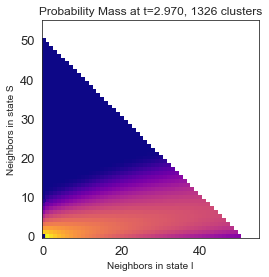

In [50]:
m_to_value_t = dict()
for timepoint in list(range(101)):
    dynamics_original   #101 rows × 2652 columns
    dyn_o =  dynamics_original.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:   # do weights
            m_to_value[m] = value
    prints(m_to_value) 
    m_to_value_t[timepoint] = copy.copy(m_to_value)

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'Original Inf   t='+real_time, timepoint/101.0*3)

# Plot Reduced 

{'(6, (6.0, 3.0))': [(7, 3), (6, 3)], '(9, (8.0, 1.0))': [(31, 6), (36, 8), (34, 8), (33, 4), (38, 5), (27, 6), (29, 4), (42, 6), (36, 4), (25, 3), (35, 8), (33, 8), (38, 9), (25, 4), (26, 3), (30, 5), (42, 8), (43, 5), (44, 6), (32, 4), (34, 6), (39, 5), (27, 3), (28, 4), (40, 6), (41, 7), (22, 5), (35, 5), (36, 6), (37, 7), (24, 4), (26, 6), (31, 5), (41, 8), (43, 7), (45, 5), (32, 6), (33, 7), (34, 4), (37, 9), (38, 6), (39, 7), (27, 5), (28, 6), (29, 7), (23, 5), (40, 8), (41, 5), (35, 7), (37, 5), (26, 4), (30, 6), (31, 7), (39, 8), (33, 5), (29, 5), (38, 8), (25, 5), (30, 4), (44, 5), (40, 5), (42, 7), (36, 5), (24, 3), (41, 9), (32, 5), (34, 7), (28, 5), (40, 7), (41, 6), (42, 5), (35, 4), (36, 7), (37, 6), (24, 5), (31, 4), (39, 9), (43, 6), (32, 7), (33, 6), (34, 5), (37, 8), (38, 7), (39, 6), (27, 4), (29, 6), (23, 4), (40, 9), (35, 6), (25, 6), (26, 5), (30, 7)], '(9, (1.0, 8.0))': [(5, 31), (6, 28), (5, 24), (4, 35), (8, 38), (5, 34), (9, 39), (6, 41), (5, 43), (9, 40), (6,

{(0, 0): 0.03891132150360765, (0, 1): 0.014525013119794913, (1, 0): 0.028458559492437634, (0, 2): 0.03407767668000332, (1, 1): 0.0033266626808835273, (2, 0): 0.043400199630613055, (0, 3): 0.05572074295762305, (1, 2): 0.02189487290344604, (2, 1): 0.01807039010786682, (3, 0): 0.05521582420853321, (0, 4): 0.0785003207213444, (1, 3): 0.047321391726104625, (2, 2): 0.006390456997617263, (3, 1): 0.029147462996666058, (4, 0): 0.06616736671691631, (0, 5): 0.20722055219717314, (0, 6): 0.06632383225925975, (1, 4): 0.15109534706932373, (1, 5): 0.044109938897032554, (2, 3): 0.08973355813992515, (2, 4): 0.05719998538261257, (3, 3): 0.49657191451691884, (3, 2): 0.19843605745665768, (4, 2): 0.49382794141922554, (4, 1): 0.24423068229360193, (5, 1): 0.5102571885587162, (6, 0): 0.11338335441381381, (5, 0): 0.05382730620950041, (0, 7): 0.2612014027570898, (0, 8): 3.1619613715191226e-05, (1, 6): 0.21263004952373998, (1, 7): 0.011961089421795874, (2, 5): 0.1413356050283871, (2, 6): 0.034609977653177276, (3,

{(0, 0): 0.2928687843836177, (0, 1): 0.023795979450564567, (1, 0): 0.047281142195768434, (0, 2): 0.006080072140030659, (1, 1): 0.016109155662765877, (2, 0): 0.04658932318291403, (0, 3): 0.04393537356181327, (1, 2): 0.02230797309940059, (2, 1): 0.015472580655603212, (3, 0): 0.04543781161287029, (0, 4): 0.08850536498077803, (1, 3): 0.06797832026663143, (2, 2): 0.019640639916220337, (3, 1): 0.014693992544231635, (4, 0): 0.04530238922191327, (0, 5): 0.31070212441237105, (0, 6): 0.11874883368312417, (1, 4): 0.2637044854726999, (1, 5): 0.08199914890242185, (2, 3): 0.2097147531562092, (2, 4): 0.17214289863311485, (3, 3): 0.5431691359970355, (3, 2): 0.125919773322033, (4, 2): 0.5237376098310532, (4, 1): 0.1924181950109101, (5, 1): 0.5194686262220563, (6, 0): 0.03052715211873281, (5, 0): 0.04512814814099862, (0, 7): 0.39522336529271296, (0, 8): 0.04288922581817958, (1, 6): 0.35765338034901667, (1, 7): 0.06693223576132179, (2, 5): 0.26161590523648043, (2, 6): 0.07599604805167225, (3, 5): 0.39052

{(0, 0): 0.5030342914876207, (0, 1): 0.03906736457854528, (1, 0): 0.05423220939004385, (0, 2): 0.007212028515108323, (1, 1): 0.021848437988430103, (2, 0): 0.04318066900963513, (0, 3): 0.031690705433439215, (1, 2): 0.016822423947049078, (2, 1): 0.014055143573752895, (3, 0): 0.03502469558801463, (0, 4): 0.08134589980009127, (1, 3): 0.06645207541596622, (2, 2): 0.017510626484754765, (3, 1): 0.00899576873320995, (4, 0): 0.029729978118617235, (0, 5): 0.3573473413512222, (0, 6): 0.17819247065918173, (1, 4): 0.3159640235557623, (1, 5): 0.13986815609392345, (2, 3): 0.24451440468313793, (2, 4): 0.2864277782009628, (3, 3): 0.5599099341497679, (3, 2): 0.13096359836681898, (4, 2): 0.5198097126493241, (4, 1): 0.19189113465689062, (5, 1): 0.5052608811910381, (6, 0): 0.006609708887635598, (5, 0): 0.029519086060953513, (0, 7): 0.46705506619843473, (0, 8): 0.05919961333889198, (1, 6): 0.4360775818643999, (1, 7): 0.08555356501235954, (2, 5): 0.28757275229815515, (2, 6): 0.18194375260564802, (3, 5): 0.38

{(0, 0): 0.6490867392895722, (0, 1): 0.048031692648362385, (1, 0): 0.05914702585410114, (0, 2): 0.014668702716182681, (1, 1): 0.02495777283088422, (2, 0): 0.040989063588203256, (0, 3): 0.022138171570834825, (1, 2): 0.011640094083125607, (2, 1): 0.013687561124451214, (3, 0): 0.028912476459747483, (0, 4): 0.0681119318749468, (1, 3): 0.05721021091411139, (2, 2): 0.012745013973752219, (3, 1): 0.0070471018753345315, (4, 0): 0.021539952594379023, (0, 5): 0.3679373447950109, (0, 6): 0.26079013211987784, (1, 4): 0.3294136920658631, (1, 5): 0.2218585355388223, (2, 3): 0.24052184268151533, (2, 4): 0.3585861155817401, (3, 3): 0.5647656371201336, (3, 2): 0.1454619128402113, (4, 2): 0.5136576230959291, (4, 1): 0.19610650596136855, (5, 1): 0.49637450690684, (6, 0): 0.0011706022127580635, (5, 0): 0.020403388343438054, (0, 7): 0.49109758566741524, (0, 8): 0.007465123537733282, (1, 6): 0.4618596324515834, (1, 7): 0.03315426036432722, (2, 5): 0.2502109000426909, (2, 6): 0.327621566303223, (3, 5): 0.3939

{(0, 0): 0.7566613768751956, (0, 1): 0.05490995751456117, (1, 0): 0.06369166886953358, (0, 2): 0.018481685795498765, (1, 1): 0.026239467945171176, (2, 0): 0.03959901127070092, (0, 3): 0.017180067985668394, (1, 2): 0.00926216791479298, (2, 1): 0.012801316630785998, (3, 0): 0.024915967835488995, (0, 4): 0.05793888453754619, (1, 3): 0.04954447878847893, (2, 2): 0.010209457900275505, (3, 1): 0.0055984881892351904, (4, 0): 0.016718551275758182, (0, 5): 0.3620330208182715, (0, 6): 0.33504943015751393, (1, 4): 0.3250142370168938, (1, 5): 0.2954484288572935, (2, 3): 0.23369023780184853, (2, 4): 0.39252541657771706, (3, 3): 0.5675886191975682, (3, 2): 0.1519326164075374, (4, 2): 0.5118724625017217, (4, 1): 0.19692711599851076, (5, 1): 0.49318472861060775, (6, 0): 0.004518952358060557, (5, 0): 0.015050840544120059, (0, 7): 0.4637471452800604, (0, 8): 0.11738828974740241, (1, 6): 0.43336013815573593, (1, 7): 0.09291247375045435, (2, 5): 0.20930214737989994, (2, 6): 0.425853604126036, (3, 5): 0.40

{(0, 0): 0.8340104816918371, (0, 1): 0.06065348164577459, (1, 0): 0.06787720082351797, (0, 2): 0.02033036128978898, (1, 1): 0.026499723457918185, (2, 0): 0.03842373121073236, (0, 3): 0.014658180639141746, (1, 2): 0.008316403857203995, (2, 1): 0.011596578731880521, (3, 0): 0.021845517247653372, (0, 4): 0.050188561539848374, (1, 3): 0.043369632627519, (2, 2): 0.008898500770476903, (3, 1): 0.004339490065798144, (4, 0): 0.013419088489734624, (0, 5): 0.3499712884005987, (0, 6): 0.389783012224766, (1, 4): 0.3138827224016729, (1, 5): 0.34973964535328106, (2, 3): 0.22854396940695876, (2, 4): 0.40909631149617615, (3, 3): 0.5698443181387398, (3, 2): 0.1545141271703051, (4, 2): 0.5120089850460292, (4, 1): 0.1964484275446586, (5, 1): 0.49224298420998797, (6, 0): 0.006385088753987655, (5, 0): 0.011624386207751353, (0, 7): 0.40489578520870706, (0, 8): 0.2637461448876608, (1, 6): 0.3735563523295361, (1, 7): 0.23915721804020137, (2, 5): 0.18074979440989516, (2, 6): 0.47751149450619984, (3, 5): 0.41356

{(0, 0): 0.8880938617449831, (0, 1): 0.06556622954598555, (1, 0): 0.07161105406437179, (0, 2): 0.021241083808246585, (1, 1): 0.02629195429538054, (2, 0): 0.03726157088342136, (0, 3): 0.012996731829336193, (1, 2): 0.007750196024805199, (2, 1): 0.010391688629131939, (3, 0): 0.01929362048529367, (0, 4): 0.04361800062296011, (1, 3): 0.03794085028288604, (2, 2): 0.007968910661514865, (3, 1): 0.0033422681111164344, (4, 0): 0.01097272261994001, (0, 5): 0.3368801053502881, (0, 6): 0.4264256241070217, (1, 4): 0.3015642385829672, (1, 5): 0.3860057670415778, (2, 3): 0.2245564428161793, (2, 4): 0.41807014606266474, (3, 3): 0.5716646246699911, (3, 2): 0.15581536148218822, (4, 2): 0.5126671702484303, (4, 1): 0.19582238018261633, (5, 1): 0.49203386529284093, (6, 0): 0.007609609333540728, (5, 0): 0.009297741911386785, (0, 7): 0.3464219223159688, (0, 8): 0.37334152949452126, (1, 6): 0.31544697530722976, (1, 7): 0.3478198956189711, (2, 5): 0.16298958689934998, (2, 6): 0.5029245434628646, (3, 5): 0.41873

{(0, 0): 0.9251361554859961, (0, 1): 0.06978241174347427, (1, 0): 0.07487592163822883, (0, 2): 0.021698002558937158, (1, 1): 0.025894019127756303, (2, 0): 0.03610572026750313, (0, 3): 0.011613824056678785, (1, 2): 0.007211180581675079, (2, 1): 0.009340742758450272, (3, 0): 0.017152794540827437, (0, 4): 0.03797473054840004, (1, 3): 0.03321579098808037, (2, 2): 0.007151390902255333, (3, 1): 0.0026222706769665816, (4, 0): 0.009125437587267492, (0, 5): 0.3255181255044216, (0, 6): 0.4493785791943741, (1, 4): 0.2909196390512925, (1, 5): 0.408582572894429, (2, 3): 0.2214236697611905, (2, 4): 0.4232610136897847, (3, 3): 0.5731182646607851, (3, 2): 0.15668469726912368, (4, 2): 0.5134018001397883, (4, 1): 0.19534630043419166, (5, 1): 0.49207003961496704, (6, 0): 0.008476815512026517, (5, 0): 0.007674111148189432, (0, 7): 0.3048797946405127, (0, 8): 0.43563948345283543, (1, 6): 0.27490715530676846, (1, 7): 0.409221397913672, (2, 5): 0.15243339150772678, (2, 6): 0.5152803558035788, (3, 5): 0.42218

{(0, 0): 0.9501567993886476, (0, 1): 0.0733903770195604, (1, 0): 0.07769856742292083, (0, 2): 0.021919115080836445, (1, 1): 0.025436302519667896, (2, 0): 0.03500036399556264, (0, 3): 0.010371016606451679, (1, 2): 0.006650882660636904, (2, 1): 0.008488731011792981, (3, 0): 0.015388796434772414, (0, 4): 0.033301936515344875, (1, 3): 0.029305865740282377, (2, 2): 0.00640576241105649, (3, 1): 0.002141142190441203, (4, 0): 0.007742806752740746, (0, 5): 0.31682754947692343, (0, 6): 0.46312655797691765, (1, 4): 0.28287545118901863, (1, 5): 0.4219637513187034, (2, 3): 0.21901456857787774, (2, 4): 0.4263583733612144, (3, 3): 0.5742717208483024, (3, 2): 0.15735391089101672, (4, 2): 0.5140869427969275, (4, 1): 0.19503625481099507, (5, 1): 0.4921949566612873, (6, 0): 0.009109014494064288, (5, 0): 0.006526228790136252, (0, 7): 0.2801923556122178, (0, 8): 0.46642255756429846, (1, 6): 0.2512057397699957, (1, 7): 0.4393388549040672, (2, 5): 0.14620986357131335, (2, 6): 0.5214130178885258, (3, 5): 0.42

{(0, 0): 0.9669076897779525, (0, 1): 0.07646483770480887, (1, 0): 0.08012137465009257, (0, 2): 0.022011216588036207, (1, 1): 0.0249819484711833, (2, 0): 0.03398584604506448, (0, 3): 0.009259622282653507, (1, 2): 0.006100107665253748, (2, 1): 0.007830155829861327, (3, 0): 0.013969500541970329, (0, 4): 0.029590814695834442, (1, 3): 0.026227721179843885, (2, 2): 0.005743446184201124, (3, 1): 0.001843512006990342, (4, 0): 0.006723970359077554, (0, 5): 0.3106717319961696, (0, 6): 0.4711478239035444, (1, 4): 0.2772741332039291, (1, 5): 0.42964579024092964, (2, 3): 0.2172050885274994, (2, 4): 0.42823246342707755, (3, 3): 0.5751842630284152, (3, 2): 0.15788793967172451, (4, 2): 0.5146899792471654, (4, 1): 0.19484739025262693, (5, 1): 0.4923504440219677, (6, 0): 0.009575141080359182, (5, 0): 0.0057058897662852605, (0, 7): 0.266797947705711, (0, 8): 0.48080430064372626, (1, 6): 0.238584456686197, (1, 7): 0.4532339867288699, (2, 5): 0.1424620075963066, (2, 6): 0.5246096998693839, (3, 5): 0.426229

{(0, 0): 0.9780571551605922, (0, 1): 0.07907406944240314, (1, 0): 0.08219023748474753, (0, 2): 0.0220334965257474, (1, 1): 0.02456267471651871, (2, 0): 0.033087028387465495, (0, 3): 0.008291251518616078, (1, 2): 0.005593168348556617, (2, 1): 0.007340048789784578, (3, 0): 0.01285384234960515, (0, 4): 0.02674344870081739, (1, 3): 0.023900291147720396, (2, 2): 0.005174499122038049, (3, 1): 0.0016769367102038035, (4, 0): 0.005984490422540814, (0, 5): 0.30651472145572717, (0, 6): 0.4757655556813112, (1, 4): 0.27357662152490236, (1, 5): 0.4339625255752685, (2, 3): 0.21586627040078835, (2, 4): 0.42937219643608887, (3, 3): 0.5759057896313314, (3, 2): 0.1583131251622931, (4, 2): 0.5152071479975442, (4, 1): 0.19473562656562649, (5, 1): 0.49251098697169127, (6, 0): 0.0099208952129823, (5, 0): 0.005112079219399305, (0, 7): 0.25982552575844675, (0, 8): 0.48747416793500076, (1, 6): 0.23218547320382854, (1, 7): 0.4595352254397382, (2, 5): 0.14011100786769498, (2, 6): 0.5263963622476606, (3, 5): 0.427

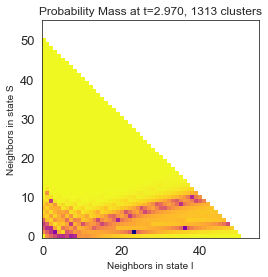

In [72]:
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering)
prints(cluster_to_m)

for timepoint in list(range(101)):
    m_to_value_baseline = m_to_value_t[timepoint]
    dynamics_reduced   #101 rows × 2652 columns
    dyn_o =  dynamics_reduced.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:  
            m_to_value[m] = value * m_to_weight[m]  #ORIGINAL
            #m_to_value[m] = np.abs(m_to_value_baseline[m] - m_to_value[m])  # For Diff plot
            m_to_value[m] = np.abs(m_to_value_baseline[m] - m_to_value[m])/(m_to_value_baseline[m]+m_to_value[m])  # For Diff plot relativ error
            #m_to_value[m] = np.log(np.abs(m_to_value_baseline[m] - m_to_value[m])+0.00000000000001)
    prints(m_to_value) 

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'DIFFReduced 73 Inf   t='+real_time, timepoint/101.0*3)